In [3]:
#Day 8 - Histograms - 30daychartchallenge 2025

import pandas as pd


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv("/content/gdrive/My Drive/Spotify_2024_Global_Streaming_Data.csv")
# Quick preview
print(df.head())
print(df.info())

         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [6]:


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Confirm column names
print(df.columns.tolist())

# Just rename for ease of use
df.rename(columns={
    'total_streams_millions': 'streams_millions',
    'monthly_listeners_millions': 'monthly_listeners_millions',
    'streams_last_30_days_millions': 'streams_last_30_days_millions',
    'avg_stream_duration_min': 'avg_stream_duration_min',
    'skip_rate_%': 'skip_rate_pct'
}, inplace=True)

# Preview cleaned data
print(df[['artist', 'genre', 'streams_millions', 'avg_stream_duration_min', 'skip_rate_pct']].head())



['country', 'artist', 'album', 'genre', 'release_year', 'monthly_listeners_millions', 'total_streams_millions', 'total_hours_streamed_millions', 'avg_stream_duration_min', 'platform_type', 'streams_last_30_days_millions', 'skip_rate_%']
         artist      genre  streams_millions  avg_stream_duration_min  \
0  Taylor Swift      K-pop           3695.53                     4.28   
1    The Weeknd        R&B           2828.16                     3.90   
2   Post Malone  Reggaeton           1425.46                     4.03   
3    Ed Sheeran      K-pop           2704.33                     3.26   
4    Ed Sheeran        R&B           3323.25                     4.47   

   skip_rate_pct  
0           2.24  
1          23.98  
2           4.77  
3          25.12  
4          15.82  


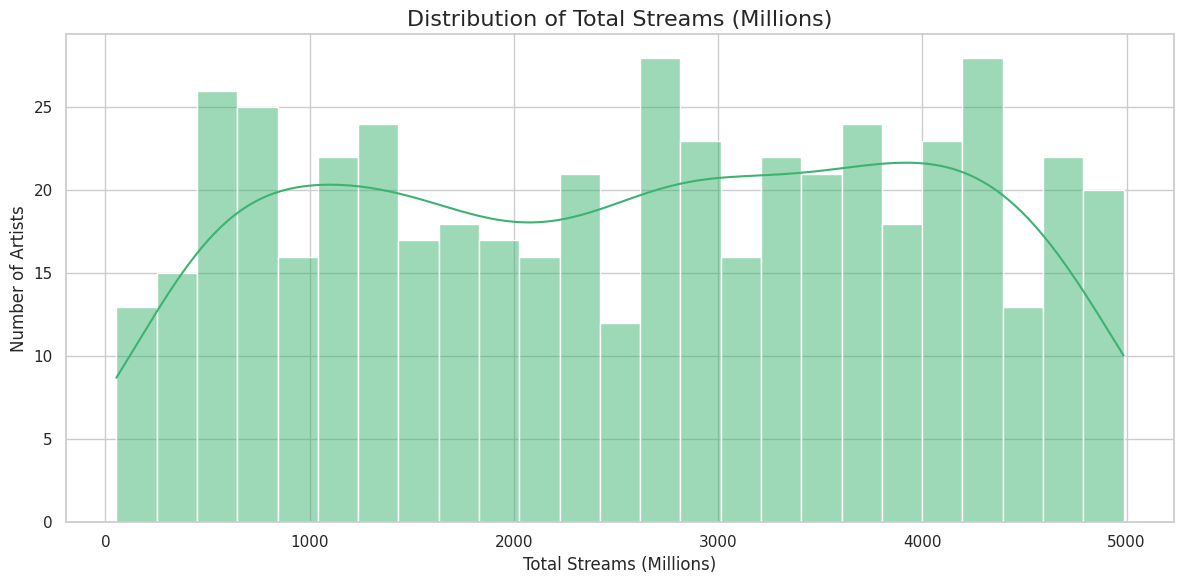

In [7]:
# 📊 Histogram Code: Total Streams Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot histogram of total streams
plt.figure(figsize=(12, 6))
sns.histplot(df['streams_millions'], bins=25, kde=True, color='mediumseagreen')

plt.title('Distribution of Total Streams (Millions)', fontsize=16)
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Number of Artists')
plt.tight_layout()
plt.show()


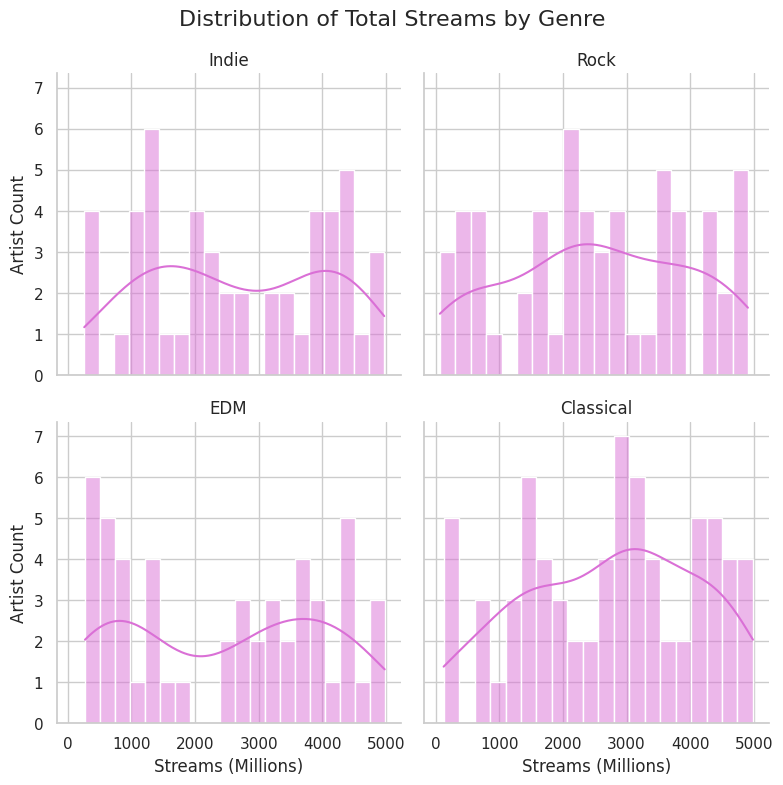

In [8]:
# Histogram Series by Genre
# Choose top 4 most common genres
top_genres = df['genre'].value_counts().nlargest(4).index
df_top_genres = df[df['genre'].isin(top_genres)]

# Facet histogram: Streams by genre
g = sns.FacetGrid(df_top_genres, col='genre', col_wrap=2, height=4, sharex=True)
g.map(sns.histplot, 'streams_millions', bins=20, kde=True, color='orchid')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Streams (Millions)", "Artist Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Total Streams by Genre", fontsize=16)
plt.show()


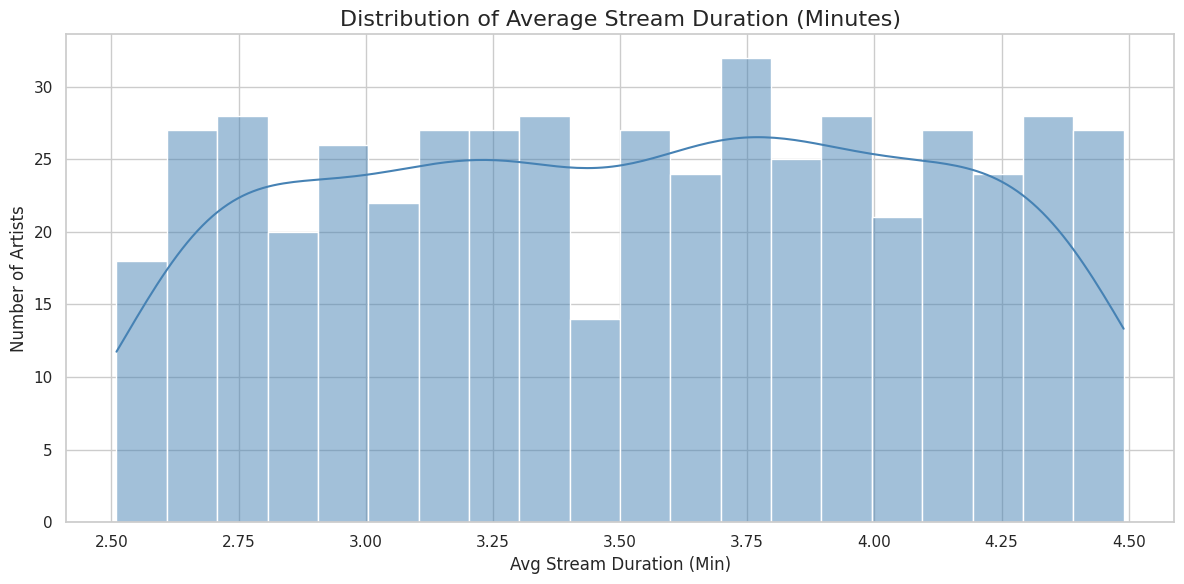

In [9]:
# Histogram of average stream duration
plt.figure(figsize=(12, 6))
sns.histplot(df['avg_stream_duration_min'], bins=20, kde=True, color='steelblue')

plt.title('Distribution of Average Stream Duration (Minutes)', fontsize=16)
plt.xlabel('Avg Stream Duration (Min)')
plt.ylabel('Number of Artists')
plt.tight_layout()
plt.show()


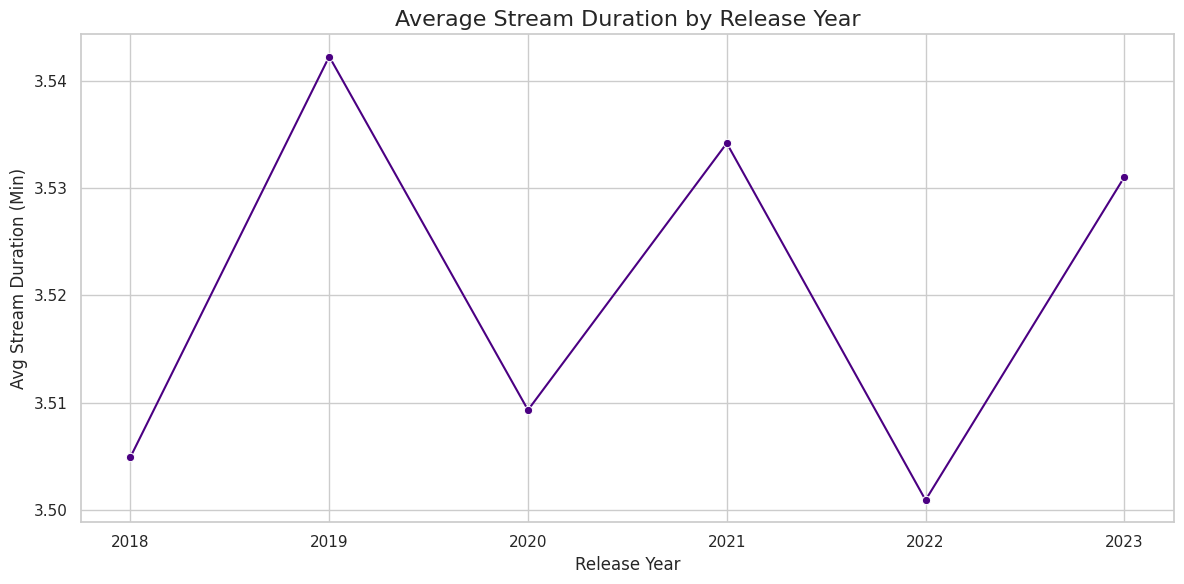

In [10]:
# Optional: lineplot of average stream duration per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('release_year')['avg_stream_duration_min'].mean().reset_index(),
             x='release_year', y='avg_stream_duration_min', marker='o', color='indigo')

plt.title('Average Stream Duration by Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Avg Stream Duration (Min)')
plt.tight_layout()
plt.show()


<ipython-input-13-1da637df2f3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='total_hours_streamed_millions', y='artist', palette='viridis')


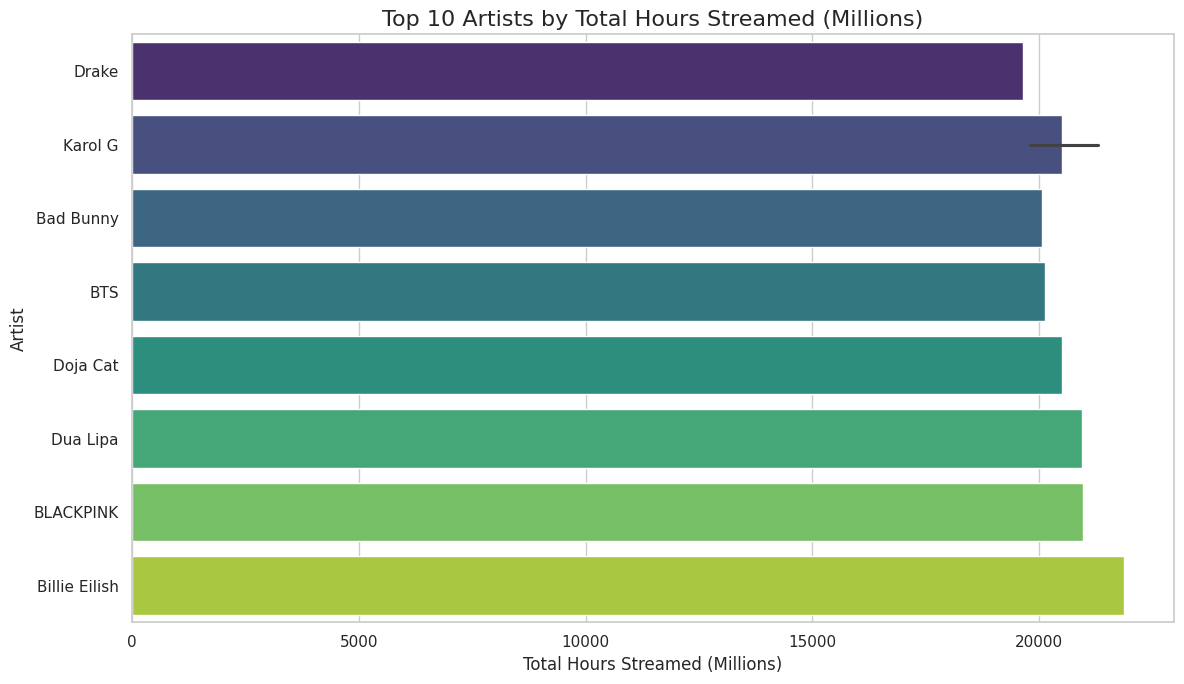

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 10 artists by total hours streamed
top10 = df.sort_values(by='total_hours_streamed_millions', ascending=False).head(10)

# Optional: sort again for better bar ordering in the chart
top10 = top10.sort_values('total_hours_streamed_millions', ascending=True)

# Step 2: Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=top10, x='total_hours_streamed_millions', y='artist', palette='viridis')

plt.title('Top 10 Artists by Total Hours Streamed (Millions)', fontsize=16)
plt.xlabel('Total Hours Streamed (Millions)')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


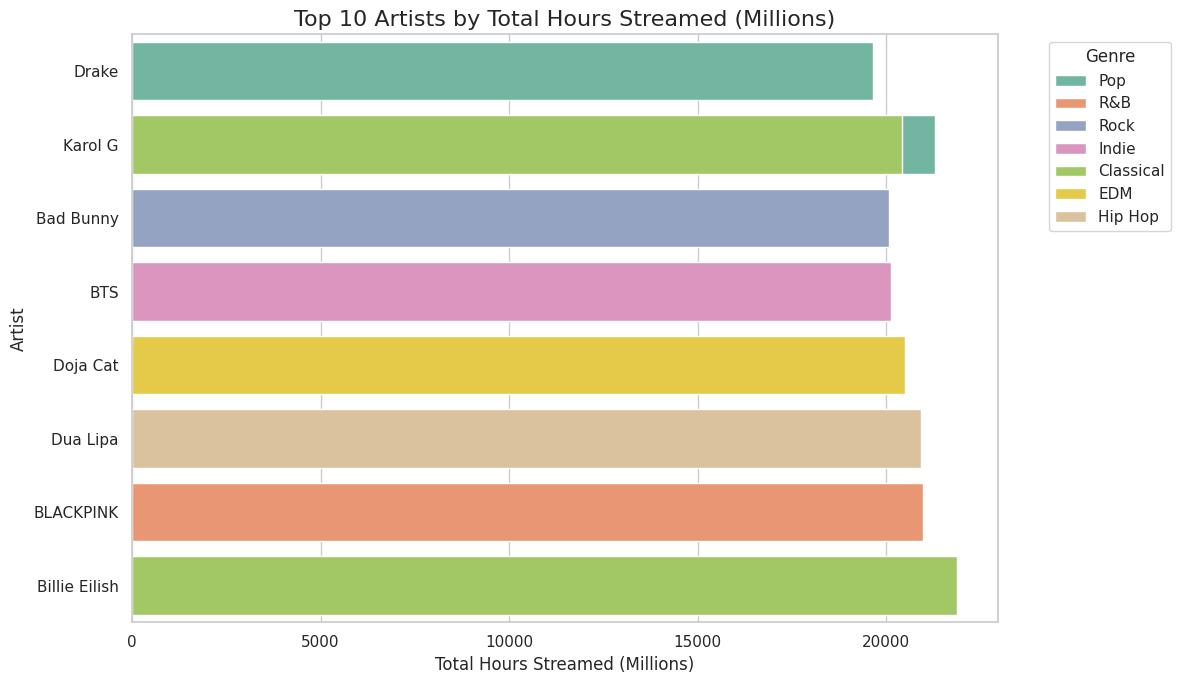

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 10 artists by total hours streamed
top10 = df.sort_values(by='total_hours_streamed_millions', ascending=False).head(10)

# Step 2: Sort for better visuals (bars ordered top-down)
top10 = top10.sort_values('total_hours_streamed_millions', ascending=True)

# Step 3: Plot with hue by genre
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top10,
    x='total_hours_streamed_millions',
    y='artist',
    hue='genre',
    dodge=False,
    palette='Set2'
)

plt.title('Top 10 Artists by Total Hours Streamed (Millions)', fontsize=16)
plt.xlabel('Total Hours Streamed (Millions)')
plt.ylabel('Artist')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


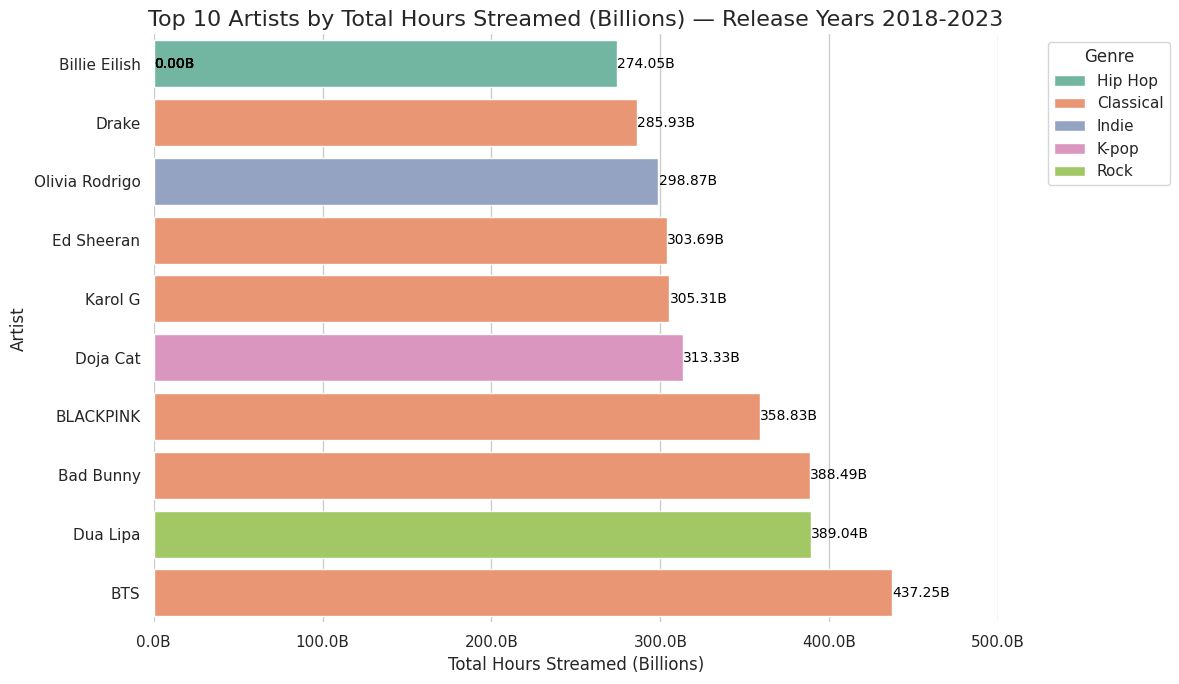

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 0: Clean genre (only keep the first if multiple genres exist)
df['genre'] = df['genre'].astype(str).apply(lambda x: x.split('/')[0].split(',')[0].strip())

# Step 1: Group by artist and aggregate values
artist_summary = df.groupby('artist', as_index=False).agg({
    'total_hours_streamed_millions': 'sum',
    'genre': lambda x: x.mode()[0],  # most common genre
    'release_year': ['min', 'max']
})

# Flatten columns
artist_summary.columns = ['artist', 'total_hours_streamed_millions', 'genre', 'release_year_min', 'release_year_max']

# Convert hours to billions
artist_summary['total_hours_streamed_billions'] = artist_summary['total_hours_streamed_millions'] / 1000

# Step 2: Get top 10 artists
top10 = artist_summary.sort_values('total_hours_streamed_billions', ascending=False).head(10)
top10 = top10.sort_values('total_hours_streamed_billions', ascending=True).reset_index(drop=True)

# Get release year span
min_year = top10['release_year_min'].min()
max_year = top10['release_year_max'].max()

# Step 3: Plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=top10,
    x='total_hours_streamed_billions',
    y='artist',
    hue='genre',
    dodge=False,
    palette='Set2'
)

# Step 4: Add labels to bars
for bar in barplot.patches:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    barplot.text(
        width + 0.05,
        y_pos,
        f"{width:.2f}B",
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Titles and axis labels
plt.title(f'Top 10 Artists by Total Hours Streamed (Billions) — Release Years {min_year}-{max_year}', fontsize=16)
plt.xlabel('Total Hours Streamed (Billions)')
plt.ylabel('Artist')

# Format x-axis ticks
plt.xticks(ticks=plt.xticks()[0], labels=[f"{x:.1f}B" for x in plt.xticks()[0]])

# Final cleanup
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


<ipython-input-21-6de7d17e8296>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-21-6de7d17e8296>:27: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


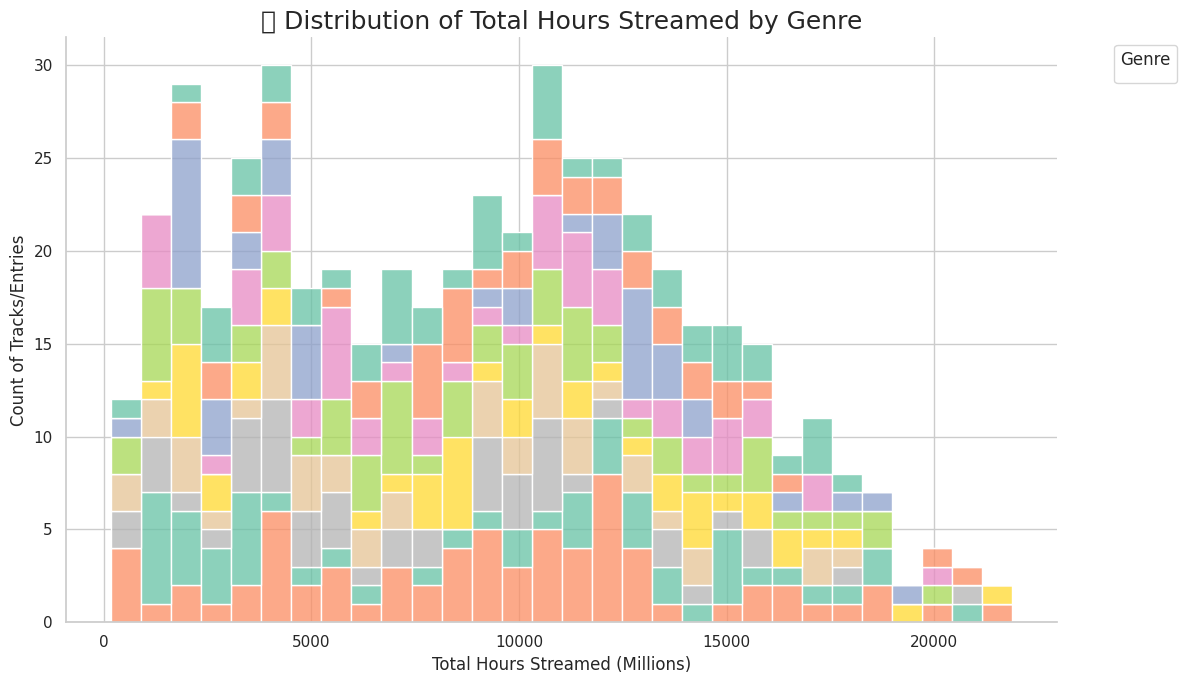

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean genre field for consistency
df['genre'] = df['genre'].astype(str).apply(lambda x: x.split('/')[0].split(',')[0].strip())

# Plot the histogram
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df,
    x='total_hours_streamed_millions',
    hue='genre',
    multiple='stack',
    bins=30,
    palette='Set2',
    edgecolor='white'
)

# Title and axes
plt.title('🔥 Distribution of Total Hours Streamed by Genre', fontsize=18)
plt.xlabel('Total Hours Streamed (Millions)', fontsize=12)
plt.ylabel('Count of Tracks/Entries', fontsize=12)

# Clean visuals
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


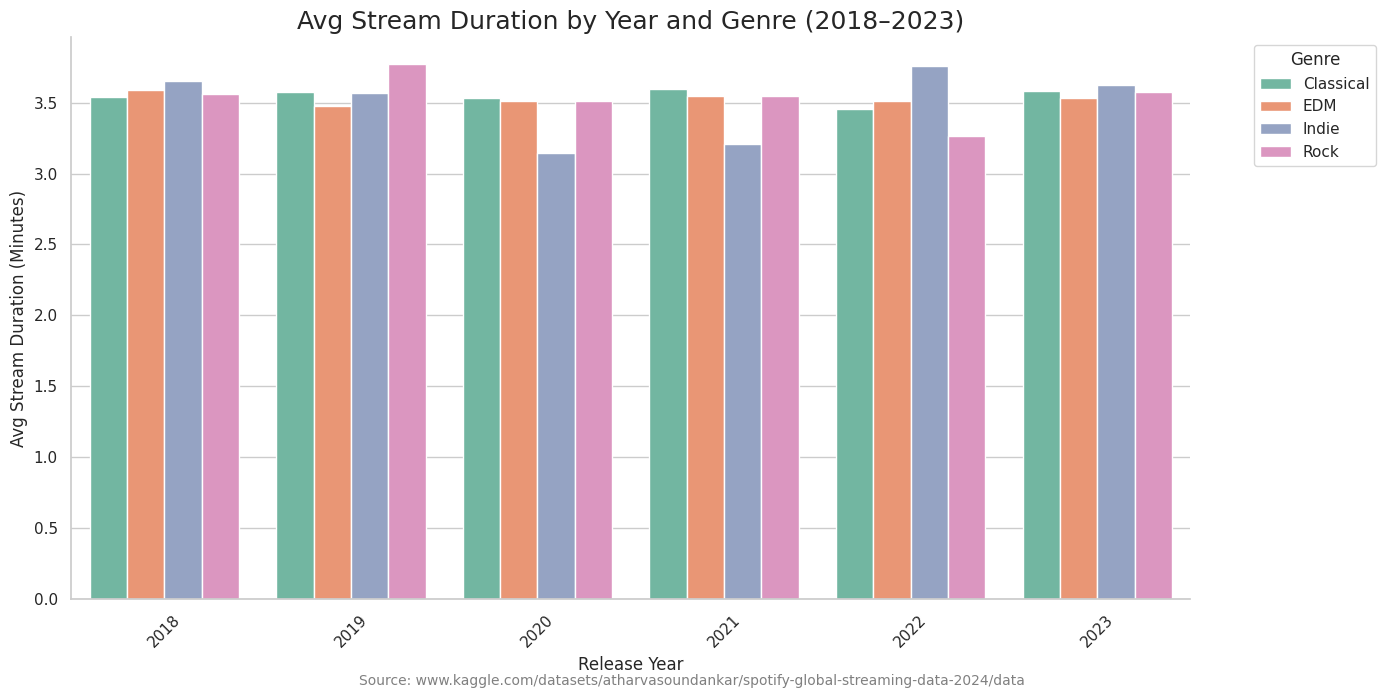

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 4 genres by frequency
top_genres = df['genre'].value_counts().nlargest(4).index
df_filtered = df[df['genre'].isin(top_genres)]

# Step 2: Group and aggregate
grouped = df_filtered.groupby(['release_year', 'genre'])['avg_stream_duration_min'].mean().reset_index()

# Get release year span for title
min_year = grouped['release_year'].min()
max_year = grouped['release_year'].max()

# Step 3: Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='release_year', y='avg_stream_duration_min', hue='genre', palette='Set2')

plt.title(f'Avg Stream Duration by Year and Genre ({min_year}–{max_year})', fontsize=18)
plt.xlabel('Release Year')
plt.ylabel('Avg Stream Duration (Minutes)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
# Add footer
plt.figtext(0.5, 0.01, 'Source: www.kaggle.com/datasets/atharvasoundankar/spotify-global-streaming-data-2024/data', ha="center", fontsize=10, color='gray')

plt.show()
